In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
Base.classes.keys()

['measurement', 'station']

# Exploratory Climate Analysis

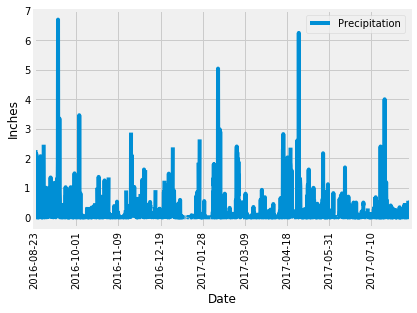

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).\
   order_by(Measurement.date.desc()).first()
last_date
query_date = dt.datetime(2017 , 8 ,23) - dt.timedelta(days=366)
query_date


# Perform a query to retrieve the data and precipitation scores
twelve_m_prec = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) > query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prec_df = pd.DataFrame(twelve_m_prec)  
prec_df = prec_df.set_index('date')

# Sort the dataframe by date
prec_df = prec_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
prec_df.plot()
plt.xlabel("Date")
plt.xticks(rotation = 'vertical')
plt.ylabel("Inches")
plt.legend(["Precipitation"])


In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(prec_df.describe())

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


In [33]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement).group_by(Measurement.station).count()


9

In [56]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()


print(f"Station {station_count[0][0]} is the most active station.")
station_count

Station USC00519281 is the most active station.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min_temp = session.query(func.min(Measurement.tobs)).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) > query_date).\
    filter(Measurement.station == station_count[0][0]).all()
max_temp = session.query(func.max(Measurement.tobs)).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) > query_date).\
    filter(Measurement.station == station_count[0][0]).all()
avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) > query_date).\
    filter(Measurement.station == station_count[0][0]).all()  

print(f"Station {station_count[0][0]} recorded a min temperature of {min_temp[0][0]}, max temperature of {max_temp[0][0]}, and an average temperature of {avg_temp[0][0]}")

Station USC00519281 recorded a min temperature of 59.0, max temperature of 83.0, and an average temperature of 73.10795454545455


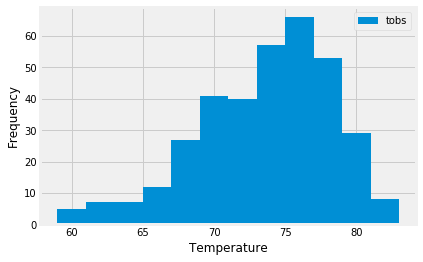

In [82]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) > query_date).\
    filter(Measurement.station == station_count[0][0]).all()
temp_df = pd.DataFrame(temp_df)
plt.hist(temp_df["tobs"],bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])

## Bonus Challenge Assignment

In [83]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [19]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [20]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [21]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [22]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [24]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [25]:
# Plot the daily normals as an area plot with `stacked=False`
